# HOUSING

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
data = pd.read_csv('housing.csv')

In [ ]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
train_data = X_train.join(Y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13272,-117.62,34.13,20.0,3216.0,516.0,1655.0,524.0,5.1261,INLAND,158800.0
19302,-122.82,38.39,32.0,1437.0,257.0,752.0,245.0,4.7422,<1H OCEAN,240900.0
2799,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,INLAND,14999.0
5098,-118.31,33.97,52.0,1595.0,325.0,823.0,302.0,3.2188,<1H OCEAN,124200.0
13514,-117.34,34.12,26.0,1008.0,164.0,568.0,196.0,3.3516,INLAND,105600.0
...,...,...,...,...,...,...,...,...,...,...
11604,-118.01,33.79,23.0,2663.0,430.0,1499.0,403.0,5.7837,<1H OCEAN,258000.0
17336,-120.45,34.88,15.0,2143.0,286.0,929.0,315.0,5.7306,<1H OCEAN,269700.0
7879,-118.11,33.87,33.0,1379.0,254.0,795.0,297.0,4.6713,<1H OCEAN,231800.0
5697,-118.26,34.24,35.0,1666.0,280.0,788.0,273.0,6.6277,<1H OCEAN,344400.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

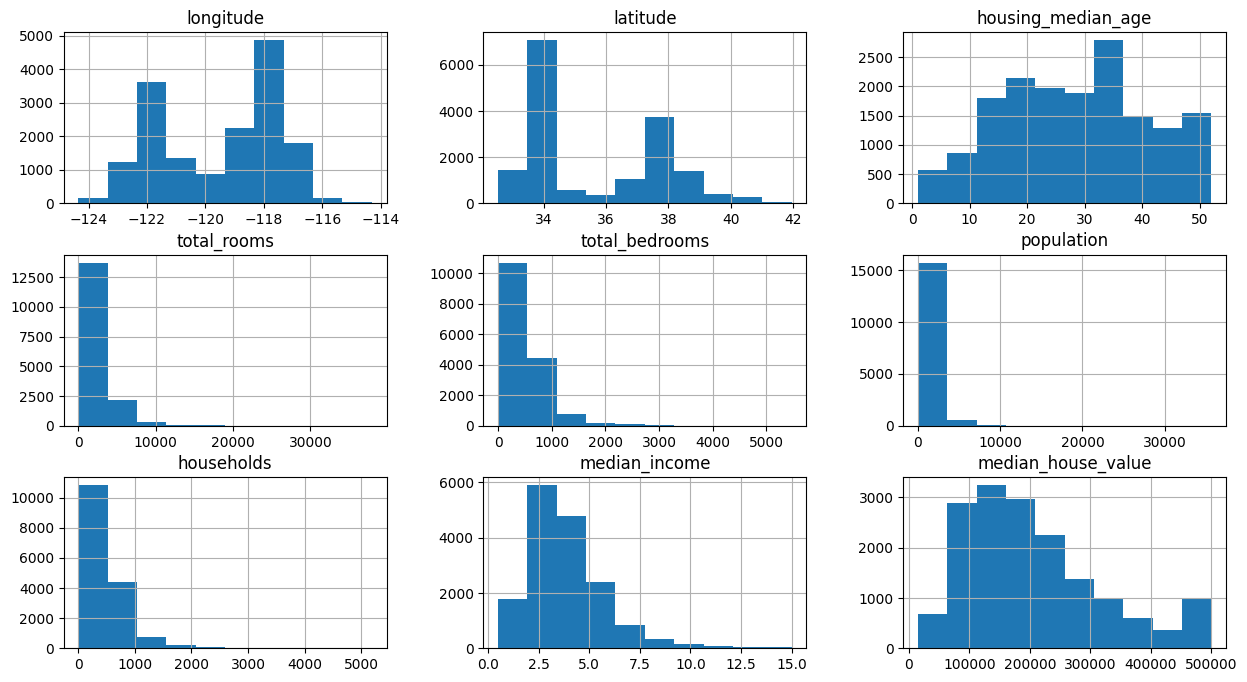

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

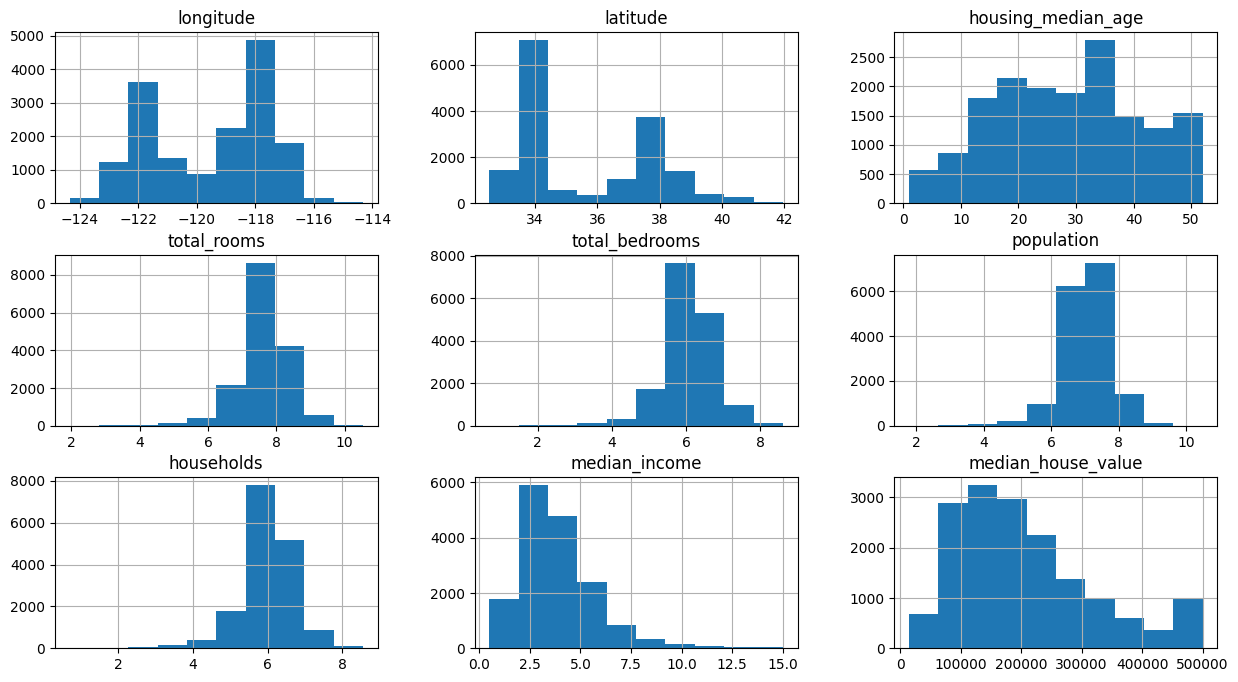

In [ ]:
train_data.hist(figsize=(15,8))

In [ ]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
13272,-117.62,34.13,20.0,8.076205,6.248043,7.412160,6.263398,5.1261,158800.0,False,True,False,False,False
19302,-122.82,38.39,32.0,7.271009,5.552960,6.624065,5.505332,4.7422,240900.0,True,False,False,False,False
2799,-117.02,36.40,19.0,6.429719,5.480639,6.196444,5.105945,2.1000,14999.0,False,True,False,False,False
5098,-118.31,33.97,52.0,7.375256,5.786897,6.714171,5.713733,3.2188,124200.0,True,False,False,False,False
13514,-117.34,34.12,26.0,6.916715,5.105945,6.343880,5.283204,3.3516,105600.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11604,-118.01,33.79,23.0,7.887584,6.066108,7.313220,6.001415,5.7837,258000.0,True,False,False,False,False
17336,-120.45,34.88,15.0,7.670429,5.659482,6.835185,5.755742,5.7306,269700.0,True,False,False,False,False
7879,-118.11,33.87,33.0,7.229839,5.541264,6.679599,5.697093,4.6713,231800.0,True,False,False,False,False
5697,-118.26,34.24,35.0,7.418781,5.638355,6.670766,5.613128,6.6277,344400.0,True,False,False,False,False


<Axes: >

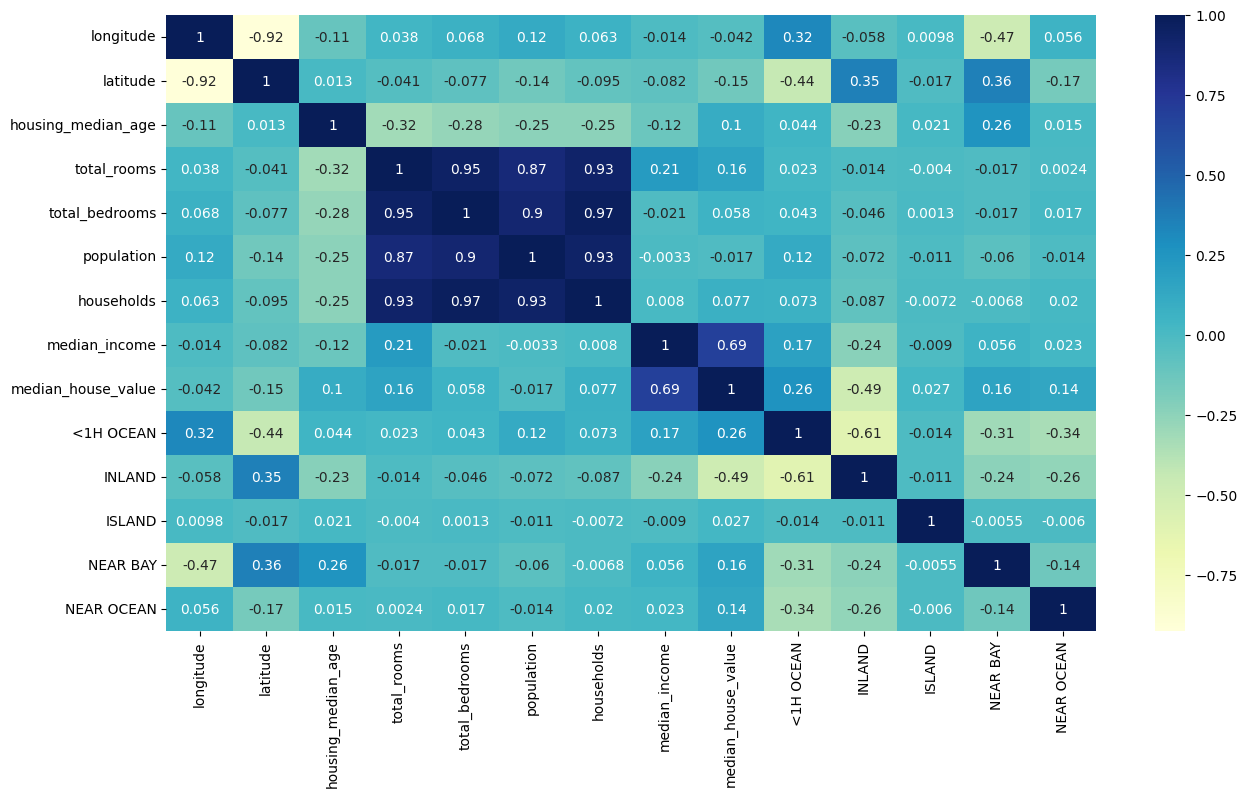

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

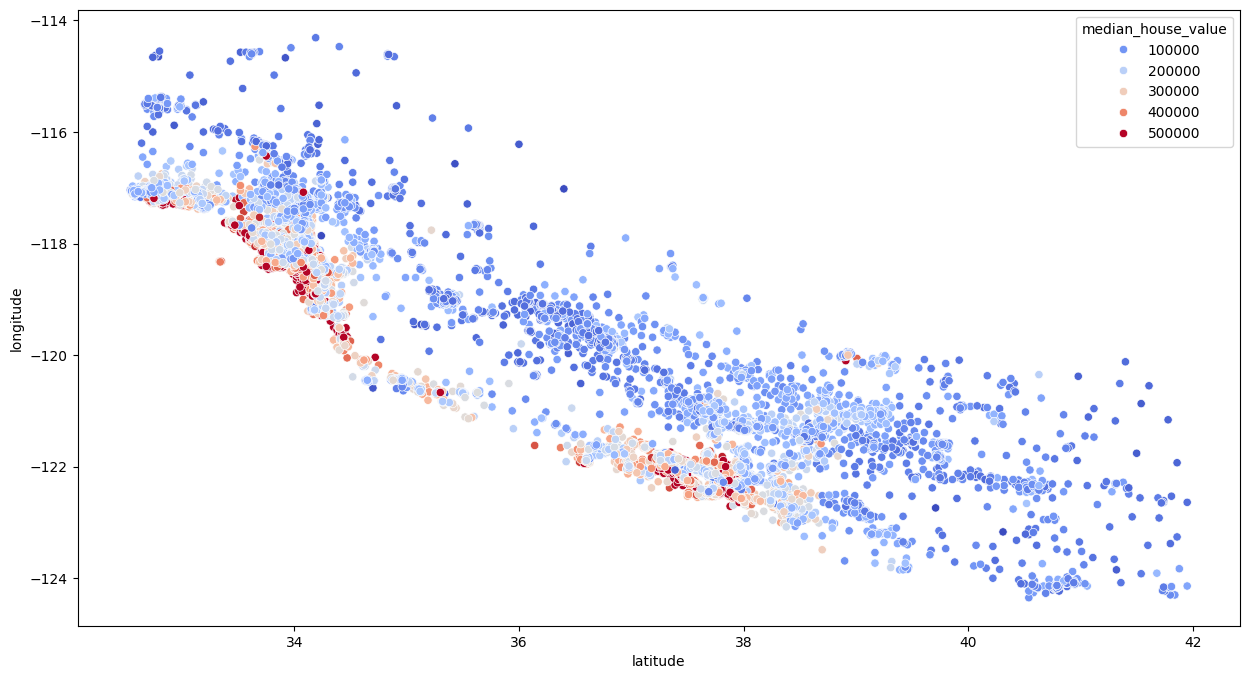

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

<Axes: >

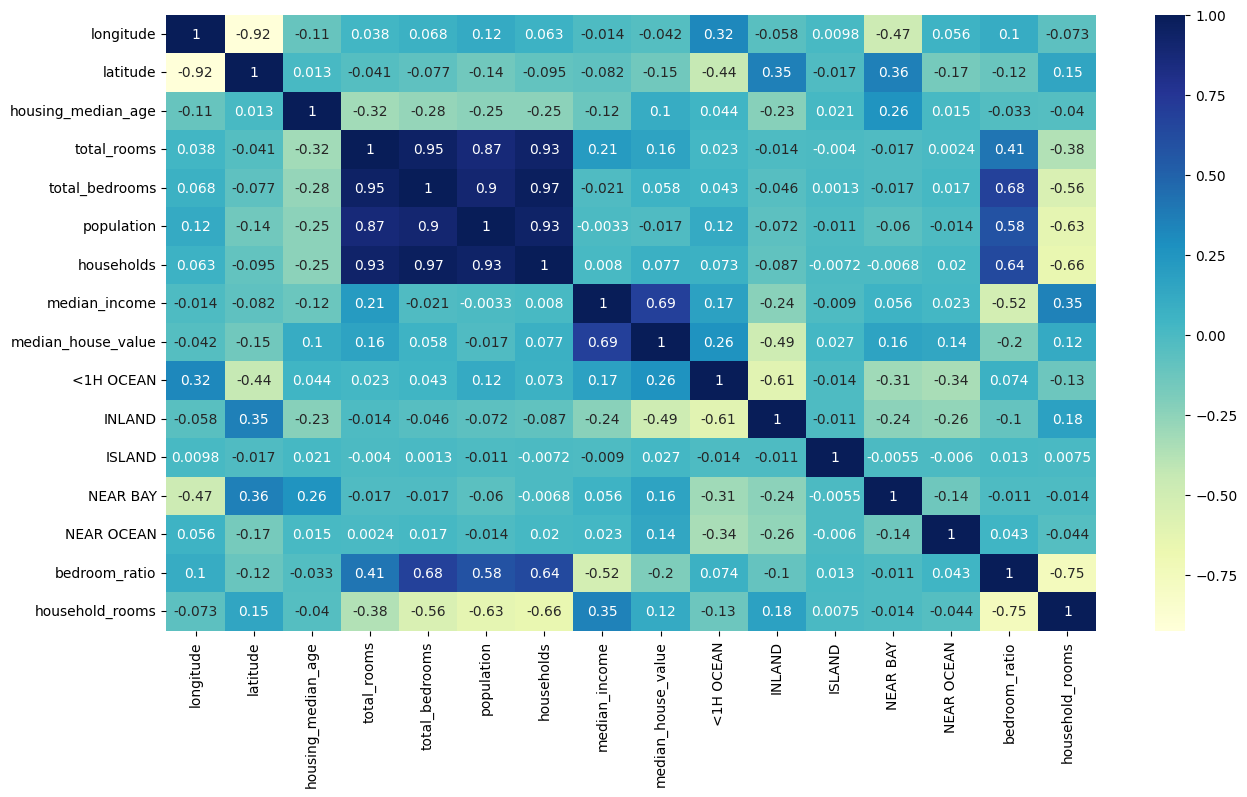

In [ ]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, Y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
test_data = X_test.join(Y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
6924,-118.07,34.01,38.0,7.716906,6.098074,7.340187,6.040255,3.7986,171000.0,True,False,False,False,False,0.790223,1.277580
946,-121.92,37.72,4.0,8.919721,7.363280,7.985484,7.317876,5.1437,299400.0,True,False,False,False,False,0.825506,1.218895
17707,-121.81,37.32,26.0,7.835579,6.238325,7.892826,6.240276,4.1165,164900.0,True,False,False,False,False,0.796154,1.255646
11204,-117.91,33.83,47.0,6.224558,4.736198,5.929589,4.700480,3.6607,160600.0,True,False,False,False,False,0.760889,1.324239
12224,-116.95,33.68,11.0,7.076654,5.187386,6.298949,4.997212,4.4792,173900.0,False,True,False,False,False,0.733028,1.416120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317,-119.67,36.89,15.0,7.772332,5.899897,7.155396,5.958425,5.3080,167500.0,False,True,False,False,False,0.759090,1.304427
14446,-117.26,32.81,37.0,7.388328,6.045005,6.478510,5.981414,2.9200,326500.0,False,False,False,False,True,0.818183,1.235214
16895,-122.36,37.58,52.0,8.034307,6.390241,7.189168,6.349139,5.0756,374200.0,False,False,False,False,True,0.795369,1.265417
14902,-117.06,32.61,23.0,7.396949,5.894403,7.145196,6.037871,2.5625,131100.0,False,False,False,False,True,0.796870,1.225092


In [ ]:
X_test, Y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']
X_test = scaler.transform(X_test)
reg.score(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


-366.1199177216455

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, Y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test, Y_test)

0.8182071046342526

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2,4],
    "max_depth": [None,4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(X_train_s, Y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_.score(X_test, Y_test)

0.8181127826200325